In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

prioritycalls = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/dpdshapefilelatlong.shp')
prioritycalls = prioritycalls.loc[~(prioritycalls["X"] == 0) & ~(prioritycalls["Y"] == 0) & ~(prioritycalls["Cancelled"] != 0)].copy()
prioritycalls = prioritycalls.loc[prioritycalls["Source"] != "Self Initiated"]
prioritycalls = prioritycalls.loc[prioritycalls["Beat"] != "DSO"]
twotosix = ['2', '3', '4', '5', '6']
twotosixcalls = prioritycalls[prioritycalls['Priority'].isin(twotosix)] 

print(twotosixcalls.shape) 
twotosixcalls.head(6)

(109315, 15)


,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)
5,21000011,None,1/1/2021,12:04:08AM,Wireless 911 Call,3,SUSPICIOUS PERSON,100 LANDSBURY DR,2007390,806379,D3,321,Resolved Without Report,0,POINT (-78.97502 35.96561)


In [10]:
twotosixcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


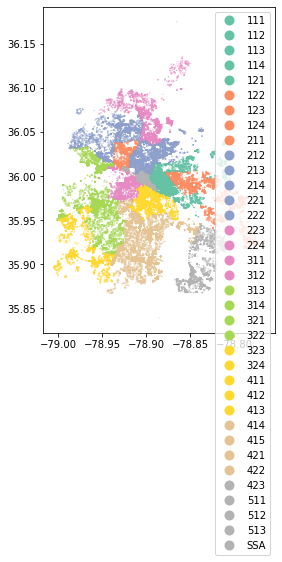

In [147]:
prioritycalls.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", aspect=1);

In [70]:
#allpriorities = pd.DataFrame(prioritycalls.groupby("Beat").agg({'Event Numb':'count'}))
#allpriorities.rename(columns=({'Event Numb':'Count_of_calls'}),inplace = True)
#allpriorities.head()

In [6]:
policebeats = gpd.read_file('/Users/erikrobertsson/Desktop/Police_Beats/Police_Beats.shp')

In [7]:
policebeats.rename(columns=({'LAWBEAT':'Beat'}),inplace = True)
policebeats


,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,Beat,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."
...,...,...,...,...,...,...,...,...,...,...,...
114,115,7055.019043,I,no,D3,324,324,None,1.669570e+06,7055.019084,"POLYGON ((-78.99155 35.88848, -78.99155 35.888..."
115,116,5532.483887,None,None,DSO,999,DSO,None,1.635085e+06,5532.483860,"POLYGON ((-78.83020 35.88529, -78.83020 35.885..."
116,117,5189.336914,I,no,D4,422,422,None,1.467878e+06,5189.336960,"POLYGON ((-78.93384 35.87957, -78.93383 35.880..."
117,118,18538.599609,I,no,D4,422,422,None,7.011386e+06,18538.594858,"POLYGON ((-78.93731 35.87502, -78.93724 35.875..."


In [8]:
allcalls = prioritycalls.groupby( ["Beat"] ).size().to_frame(name = 'calls_count').reset_index()
allcalls

,Beat,calls_count
0,111,2730
1,112,2662
2,113,3095
3,114,3059
4,121,2812
5,122,3494
6,123,2928
7,124,2067
8,211,4174
9,212,3404


In [10]:
onlydpdcalls = twotosixcalls.groupby( ["Beat"] ).size().to_frame(name = 'dpdcalls_count').reset_index()
onlydpdcalls

,Beat,dpdcalls_count
0,111,2425
1,112,2352
2,113,2751
3,114,2788
4,121,2530
5,122,3070
6,123,2640
7,124,1859
8,211,3766
9,212,3083


In [11]:
combcalls = pd.merge(allcalls, onlydpdcalls, on ='Beat')
combcalls['propofdpdcalls']= combcalls['dpdcalls_count'] / combcalls['calls_count']
combcalls.sort_values(by='dpdcalls_count', inplace=True, ascending=False)
combcalls.head()

,Beat,calls_count,dpdcalls_count,propofdpdcalls
31,423,5895,5352,0.907888
14,223,5371,4811,0.895736
29,421,4679,4164,0.889934
30,422,4647,4162,0.895632
12,221,4274,3841,0.898690


In [10]:
policebeats["Beat"] = policebeats["Beat"].map(lambda g: str(int(g+0.1)))

In [11]:
policebeatswithcalls = policebeats.set_index('Beat').join(combcalls.set_index('Beat'))
policebeatswithcalls.head(3)

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry,calls_count,pcalls_count,propofpcalls
Beat,,,,,,,,,,,,,
111,50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",2730.0,236.0,0.086447
112,51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",2662.0,216.0,0.081142
113,62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",3095.0,274.0,0.088530


In [2]:
#policebeatswithcalls = pd.merge(combcalls, policebeats, on ='Beat')
#policebeatswithcalls.head(3)


NameError: name 'policebeatswithcalls' is not defined

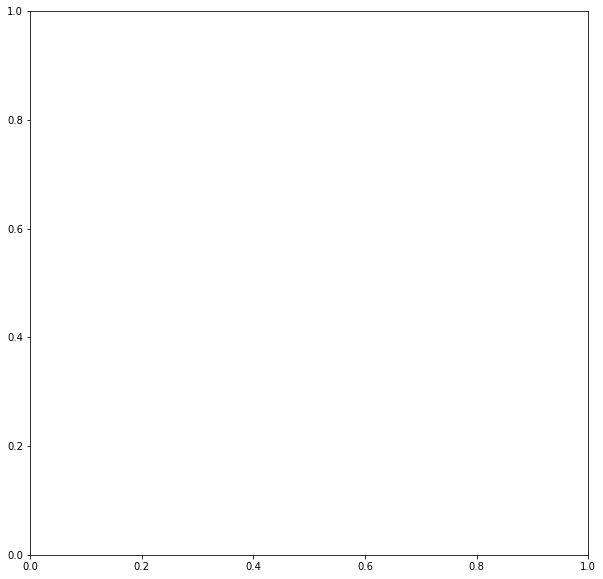

In [13]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
policebeatswithcalls.plot(column='propofdpdcalls',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

ax.set(title='Proportion of High Priority Police Calls')
plt.show()

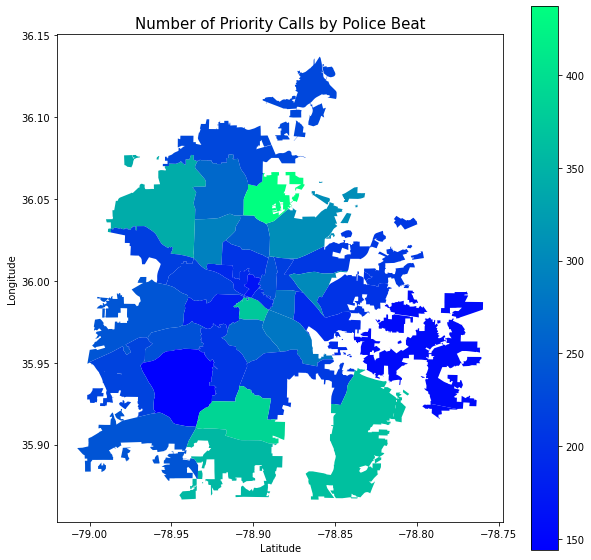

In [165]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
policebeatswithcalls.plot(column='pcalls_count',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Number of Priority Calls by Police Beat", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [1]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
policebeatswithcalls.plot(column='calls_count',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

ax.set(title='Number of Calls by Police Beat')
plt.show()

NameError: name 'plt' is not defined